In [1]:
def load_data_from_file(file_name):
    content = []
    with open("pixeldataBerea500.dat", "r") as f:
        for line in f.readlines():
            mod_line = line.strip("\n").split("\t")
            rgb = [int(i) for i in mod_line[0:3]]
            currentLayer = 1 if mod_line[3] == "Poro" else 0
            rgb.append(currentLayer)
            content.append(rgb)
    return content

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, content_data):
        self.content_data = content_data
    
    def __len__(self):
        return len(self.content_data)
    
    def __getitem__(self, index):
        data = self.content_data[index]
        rgb = torch.Tensor(data[0:3])
        currentLayer = data[3]
        
        return rgb, currentLayer
        

In [39]:
train_dataset = CustomDataset(load_data_from_file("pixeldataBerea500.dat"))
test_dataset = CustomDataset(load_data_from_file("pixeldataBerea500-test.dat"))

In [40]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [89]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 4)
        self.fc4 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.0025)
loss_function = nn.BCELoss()

In [93]:
def run_training(num_epochs):
    for epoch in range(num_epochs): # 3 full passes over the data
        for data in train_dataloader:  # `data` is a batch of data
            X, y = data  # X is the batch of features, y is the batch of targets.
            net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = net(X.view(-1, 3))  # pass in the reshaped batch (recall they are 28x28 atm)
            loss = F.nll_loss(output, y)  # calc and grab the loss value
            loss.backward()  # apply this loss backwards thru the network's parameters
            optimizer.step()  # attempt to optimize weights to account for loss/gradients
        print(f"{epoch + 1} of {num_epochs} epochs - Loss: {loss}")

In [94]:
def run_test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            X, y = data
            output = net(X.view(-1,3))
            #print(output)
            for idx, i in enumerate(output):
                #print(torch.argmax(i), y[idx])
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1
    return round(correct/total, 3)

In [95]:
def run():
    for num_epochs in range(10, 100, 10):
        for i in range(0, 11, 2): 
            lr = 1/(10 ** i)
            run_training(num_epochs, lr)
            acc = run_test()
            print(f"Epochs: {num_epochs} - LR: {lr} - Accuracy: {acc}")

In [96]:
run_training(200)

1 of 200 epochs - Loss: 0.06878980994224548
2 of 200 epochs - Loss: 0.031145740300416946
3 of 200 epochs - Loss: 0.05852103978395462
4 of 200 epochs - Loss: 0.261787474155426
5 of 200 epochs - Loss: 0.030841803178191185
6 of 200 epochs - Loss: 0.023958027362823486
7 of 200 epochs - Loss: 0.028764601796865463
8 of 200 epochs - Loss: 0.0249028243124485
9 of 200 epochs - Loss: 0.028865043073892593
10 of 200 epochs - Loss: 0.12762856483459473
11 of 200 epochs - Loss: 0.03944404050707817
12 of 200 epochs - Loss: 0.47218257188796997
13 of 200 epochs - Loss: 0.08109772950410843
14 of 200 epochs - Loss: 0.029079532250761986
15 of 200 epochs - Loss: 0.04569035768508911
16 of 200 epochs - Loss: 0.03234589099884033
17 of 200 epochs - Loss: 0.049255479127168655
18 of 200 epochs - Loss: 0.05229886248707771
19 of 200 epochs - Loss: 0.10691525042057037
20 of 200 epochs - Loss: 0.021397627890110016
21 of 200 epochs - Loss: 0.018706858158111572
22 of 200 epochs - Loss: 0.06378673762083054
23 of 200 epo

182 of 200 epochs - Loss: 0.013090741820633411
183 of 200 epochs - Loss: 0.02666901983320713
184 of 200 epochs - Loss: 0.01915600895881653
185 of 200 epochs - Loss: 0.04997364059090614
186 of 200 epochs - Loss: 0.06650811433792114
187 of 200 epochs - Loss: 0.023104671388864517
188 of 200 epochs - Loss: 0.11091914027929306
189 of 200 epochs - Loss: 0.020360253751277924
190 of 200 epochs - Loss: 0.051001645624637604
191 of 200 epochs - Loss: 0.055314481258392334
192 of 200 epochs - Loss: 0.0531124584376812
193 of 200 epochs - Loss: 0.41511502861976624
194 of 200 epochs - Loss: 0.38389962911605835
195 of 200 epochs - Loss: 0.363581120967865
196 of 200 epochs - Loss: 0.4825531840324402
197 of 200 epochs - Loss: 0.021298153325915337
198 of 200 epochs - Loss: 0.019555408507585526
199 of 200 epochs - Loss: 0.13930100202560425
200 of 200 epochs - Loss: 0.06273891031742096


In [97]:
run_test()

0.957

In [98]:
from PIL import Image

In [99]:
image = Image.open('BereaColor24.bmp')
image.show()

In [100]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

uint8
(480, 640, 3)


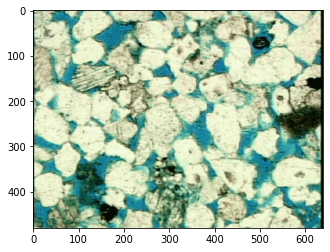

In [101]:
data = image.imread('BereaColor24.bmp')
print(data.dtype)
print(data.shape)
plt.imshow(data)
plt.show()

In [102]:
arr = np.asarray(Image.open('BereaColor24.bmp'))
print(arr.shape)

(480, 640, 3)


In [103]:
binarr = []
for i, row in enumerate(arr):
    for j, pixel in enumerate(row):
        data = torch.Tensor(pixel)
        output = torch.argmax(net(data.view(-1,3)))
        binarr.append(output)

In [104]:
out = np.reshape(binarr, (480, 640))

In [105]:
out.shape

(480, 640)

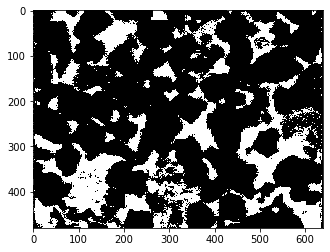

In [120]:
plt.imshow(out, cmap="gray", interpolation="nearest")
plt.show()

In [121]:
def porosity(arr):
    total = arr.shape[0] * arr.shape[1]
    pores = 0
    for i in arr:
        for j in i:
            pores += int(j)
    return pores / total

In [122]:
porosity(out)

0.24784505208333332

In [126]:
image2 = Image.fromarray((out * 255).astype(np.uint8))

In [127]:
image2.save("BereaColor24-Binarizada.bmp")

In [128]:
torch.save(net.state_dict(), "model-berea500.pt")